# > Understanding your Smartphone Data

* In this kernel, we work with the smartphone dataset. We are given certain activity features about users and also the activity that they are engaged in. The data is from the various sensors that are present in the smartphone that these users own.
* We are required to feed all these inputs to a network and then predict what activity the user is currently engaged in. 

In [30]:
# Importing the libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score
import os

In [31]:
# Loading the training and testing set:

print(os.listdir("../input"))
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

['test.csv', 'train.csv']


In [32]:
# Getting a look at our training data:

train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [33]:
# let us also check for null values in the training and test sets:

print(train.isnull().values.any())
print(test.isnull().values.any())

False
False


In [34]:
# Now let us remove the columns that are not necessary from both the training as well as the test set:

train.drop('subject', axis = 1, inplace = True)
test.drop('subject', axis = 1, inplace = True)

In [35]:
# Let us check the datatype we are dealing with in both the training and testing set:

print(train.dtypes.value_counts())
print(test.dtypes.value_counts())

float64    561
object       1
dtype: int64
float64    561
object       1
dtype: int64


In [36]:
# Getting a better sense of our training data:

train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [37]:
# Now we will try adn find the columns which have data type object because we need to one hot encode them:


object_feature = train.dtypes == np.object
object_feature = train.columns[object_feature]
object_feature

# Thus we observe that only one column that is 'Activity' is of data type object and thus we will one hot encode it.
train['Activity']

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
5               STANDING
6               STANDING
7               STANDING
8               STANDING
9               STANDING
10              STANDING
11              STANDING
12              STANDING
13              STANDING
14              STANDING
15              STANDING
16              STANDING
17              STANDING
18              STANDING
19              STANDING
20              STANDING
21              STANDING
22              STANDING
23              STANDING
24              STANDING
25              STANDING
26              STANDING
27               SITTING
28               SITTING
29               SITTING
              ...       
7322    WALKING_UPSTAIRS
7323    WALKING_UPSTAIRS
7324    WALKING_UPSTAIRS
7325    WALKING_UPSTAIRS
7326    WALKING_UPSTAIRS
7327    WALKING_UPSTAIRS
7328    WALKING_UPSTAIRS
7329    WALKING_UPSTAIRS
7330    WALKING_UPSTAIRS


In [38]:
# Label Encoding the 'Activity' column:

label_encoder = LabelEncoder()
for x in [train, test]:
    x['Activity'] = label_encoder.fit_transform(x.Activity)

In [39]:
# Checking if our label encoding worked as expected:

train.Activity.sample(5)

5499    2
3788    5
3177    3
6477    2
5349    0
Name: Activity, dtype: int64

In [40]:
# Now, we try finding the correlations between different features using pandas.corr():

feature_cols = train.columns[: -1]   #exclude the Activity column

# Calculate the correlation values:

correlated_values = train[feature_cols].corr()

# Stack the data and convert to a dataframe:

correlated_values = (correlated_values.stack().to_frame().reset_index()
                    .rename(columns={'level_0': 'Feature_1', 'level_1': 'Feature_2', 0:'Correlations'}))
correlated_values.head()

,Feature_1,Feature_2,Correlations
0,tBodyAcc-mean()-X,tBodyAcc-mean()-X,1.000000
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.148061
2,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.256952
3,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.000619
4,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.021903


In [41]:
# Creating an abs column for correlation column:

correlated_values['abs_correlation'] = correlated_values.Correlations.abs()
correlated_values.head()

,Feature_1,Feature_2,Correlations,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-X,1.000000,1.000000
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.148061,0.148061
2,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.256952,0.256952
3,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.000619,0.000619
4,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.021903,0.021903


In [42]:
# Now we pick the most correlated features:

train_fields = correlated_values.sort_values('Correlations', ascending = False).query('abs_correlation>0.8')
train_fields.sample(5)

,Feature_1,Feature_2,Correlations,abs_correlation
299148,fBodyBodyGyroMag-sma(),tBodyGyro-sma(),0.950361,0.950361
234192,"fBodyAccJerk-bandsEnergy()-1,16.2",tBodyGyroJerkMag-max(),0.828503,0.828503
193240,fBodyAccJerk-mean()-X,tBodyGyroJerkMag-min(),0.845969,0.845969
142140,tBodyGyroJerkMag-std(),tBodyAccMag-iqr(),0.806145,0.806145
177362,"fBodyAcc-bandsEnergy()-1,8.1",tBodyAccJerk-mad()-X,0.812520,0.812520


In [43]:
# Now splitting the training and validation sets:

# Getting the split indexes:

split_data = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)
train_idx, val_idx = next(split_data.split(train[feature_cols], train.Activity))

# Creating the dataframes:

x_train = train.loc[train_idx, feature_cols]
y_train = train.loc[train_idx, 'Activity']

x_val = train.loc[val_idx, feature_cols]
y_val = train.loc[val_idx, 'Activity']

In [44]:
print(y_train.value_counts(normalize = True))
print(y_val.value_counts(normalize = True))

# Thus, we observe that we have the same ratio of all the classes in both the training and validation or development set.

0    0.191411
2    0.186941
1    0.174893
3    0.166731
5    0.145939
4    0.134085
Name: Activity, dtype: float64
0    0.191296
2    0.186763
1    0.174977
3    0.166818
5    0.145966
4    0.134180
Name: Activity, dtype: float64


In [45]:
# Building a model:

lr_l2 = LogisticRegressionCV(cv=4, penalty='l2', max_iter = 1000, n_jobs = -1)
lr_l2 = lr_l2.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [46]:
# Predicitng using the Logistic Regression model:

y_predict = list()
y_proba = list()

labels = ['lr_l2']
models = [lr_l2]

for lab, mod in zip(labels, models):
    y_predict.append(pd.Series(mod.predict(x_val), name = lab))
    y_proba.append(pd.Series(mod.predict_proba(x_val).max(axis=1), name = lab))
    #.max(axis = 1) for a 1 dimensional dataframe

y_predict = pd.concat(y_predict, axis = 1)
y_proba = pd.concat(y_proba, axis = 1)

y_predict.head()

,lr_l2
0,0
1,5
2,1
3,0
4,3


In [47]:
# Calculating the precision, recall and F1 score for our model:

metrics = list()
confusion_m = dict()

for lab in labels:
    precision, recall, f_score, _ = error_metric(y_val, y_predict[lab], average = 'weighted')
    
    accuracy = accuracy_score(y_val, y_predict[lab])
    
    confusion_m[lab] = confusion_matrix(y_val, y_predict[lab])
    
    metrics.append(pd.Series({'Precision': precision, 'Recall': recall,
                            'F_score': f_score, 'Accuracy': accuracy}, name = lab))
    
metrics= pd.concat(metrics, axis =1) 
metrics

,lr_l2
Precision,0.986403
Recall,0.986401
F_score,0.986400
Accuracy,0.986401


In [48]:
#Building the second network:

import sklearn.neural_network as nn
mlpADAM =  nn.MLPClassifier(hidden_layer_sizes=(900,), max_iter=1000 , alpha=1e-4, solver='adam' , verbose=10, tol=1e-19, random_state=1, learning_rate_init=.001)
nnModelADAM = mlpADAM.fit(x_train , y_train)

Iteration 1, loss = 0.78344149
Iteration 2, loss = 0.29200334
Iteration 3, loss = 0.19982263
Iteration 4, loss = 0.16219124
Iteration 5, loss = 0.13126454
Iteration 6, loss = 0.10372706
Iteration 7, loss = 0.09325348
Iteration 8, loss = 0.09893397
Iteration 9, loss = 0.07656374
Iteration 10, loss = 0.06800380
Iteration 11, loss = 0.06325769
Iteration 12, loss = 0.05929073
Iteration 13, loss = 0.06181516
Iteration 14, loss = 0.06482960
Iteration 15, loss = 0.05786556
Iteration 16, loss = 0.05945592
Iteration 17, loss = 0.04689028
Iteration 18, loss = 0.05261938
Iteration 19, loss = 0.04570979
Iteration 20, loss = 0.04258749
Iteration 21, loss = 0.04741576
Iteration 22, loss = 0.04182988
Iteration 23, loss = 0.04454127
Iteration 24, loss = 0.03759494
Iteration 25, loss = 0.03708916
Iteration 26, loss = 0.03562502
Iteration 27, loss = 0.04022214
Iteration 28, loss = 0.03592187
Iteration 29, loss = 0.03187786
Iteration 30, loss = 0.03111959
Iteration 31, loss = 0.03489974
Iteration 32, los

Iteration 253, loss = 0.00039678
Iteration 254, loss = 0.00039541
Iteration 255, loss = 0.00039400
Iteration 256, loss = 0.00039706
Iteration 257, loss = 0.00039732
Iteration 258, loss = 0.00039739
Iteration 259, loss = 0.00041321
Iteration 260, loss = 0.00041234
Iteration 261, loss = 0.00039552
Iteration 262, loss = 0.00038463
Iteration 263, loss = 0.00038877
Iteration 264, loss = 0.00039371
Iteration 265, loss = 0.00038900
Iteration 266, loss = 0.00037929
Iteration 267, loss = 0.00038109
Iteration 268, loss = 0.00038465
Iteration 269, loss = 0.00038555
Iteration 270, loss = 0.00037536
Iteration 271, loss = 0.00037560
Iteration 272, loss = 0.00037421
Iteration 273, loss = 0.00037258
Iteration 274, loss = 0.00037283
Iteration 275, loss = 0.00037072
Iteration 276, loss = 0.00037351
Iteration 277, loss = 0.00037541
Iteration 278, loss = 0.00037066
Iteration 279, loss = 0.00036521
Iteration 280, loss = 0.00036811
Iteration 281, loss = 0.00036388
Iteration 282, loss = 0.00036481
Iteration 

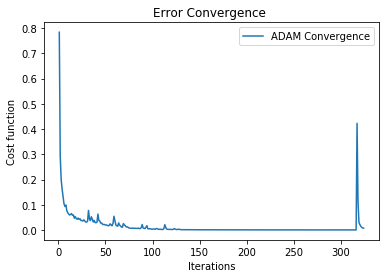

In [49]:
# Visualising the convergence:

X = np.linspace(1, nnModelADAM.n_iter_ , nnModelADAM.n_iter_)
plt.plot(X , nnModelADAM.loss_curve_, label = 'ADAM Convergence')
plt.title('Error Convergence ')
plt.ylabel('Cost function')
plt.xlabel('Iterations')
plt.legend()
plt.show()

In [50]:
# Generating the training and test scores:

print("Training set score for ADAM: %f" % mlpADAM.score(x_train, y_train))
print("Validation set score for ADAM: %f" % mlpADAM.score(x_val, y_val))

Training set score for ADAM: 0.999806
Validation set score for ADAM: 0.988214


In [51]:
# Importing the test data and dividing into test data and label:

testData  = test.drop('Activity' , axis=1).values
testLabel = test.Activity.values

In [52]:
# Label encoding the Activity:

encoder = LabelEncoder()

# Encoding test labels:

encoder.fit(testLabel)
testLabelE = encoder.transform(testLabel)

In [53]:
# Calculating the test score our Adam Classifier:

print("Test set score for ADAM: %f"     % mlpADAM.score(testData , testLabelE ))

Test set score for ADAM: 0.941636
